In [1]:
import pandas as pd
import numpy as np
import random
from lib.get_plots import *
from lib.sba_transform import *
from lib.model_pipeline import *
# from lib.dt_model import *
from lib.demo_model_pipeline import * 

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 7)   # caution: plt namespace may be taken

Populating the interactive namespace from numpy and matplotlib


/Users/ywang/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['random', 'figure']
`%matplotlib` prevents importing * from pylab and numpy



In [16]:
data = pd.read_csv('demo/fitbituser.csv', parse_dates=['date_time'])
data = filter_na(data)
print(data.describe())

             heart       steps
count  5950.000000  5950.00000
mean     71.840504    93.72084
std      16.009608   228.97116
min      43.000000     0.00000
25%      58.000000     0.00000
50%      70.000000     0.00000
75%      80.000000    49.00000
max     156.000000  2306.00000


In [18]:
data = pd.read_csv('demo/fitbituser.csv', parse_dates=['date_time'], dayfirst=False)
data = filter_na(data)
print(data.describe())
data.set_index(data.date_time, inplace=True, drop=True)
data.groupby(by=[data.index.week, data.index.dayofweek])['steps'].sum()

             heart       steps
count  5950.000000  5950.00000
mean     71.840504    93.72084
std      16.009608   228.97116
min      43.000000     0.00000
25%      58.000000     0.00000
50%      70.000000     0.00000
75%      80.000000    49.00000
max     156.000000  2306.00000


33  6     7553
34  0    15092
    1    11462
    2    11569
    3     9359
    4    14537
    5     1517
    6     4547
35  0    10626
    1     5015
    2     8982
    3     9840
    4    12313
    5     6472
    6     2744
36  0     9480
    1     6880
    2    10413
    3     6772
    4    14872
    5    10601
    6     3949
37  0     3887
    1     3422
    2     7215
    3     2602
    4    11723
    5     2145
    6     3535
38  0    20415
         ...  
39  2     3138
    3     8299
    4    13617
    5     6885
    6     3367
40  0     7239
    1     5221
    2    12852
    3     6606
    4    12239
    5     3850
    6     4826
41  0     8919
    1     7283
    2    13042
    3     5389
    4     9710
    5     7564
    6     3322
42  0    12132
    1     9116
    2    13298
    3     5612
    4    10476
    5     2298
    6     5760
43  0    10694
    1     8802
    2     7746
    3    15261
Name: steps, dtype: int64

# Fill missing data with different methods

In [7]:
ndata1 = fill_missing(data, method='mean')
ndata2 = fill_missing(data, method='rndminmax')
ndata3 = fill_missing(data, method='rnd50zeromax')
ndata4 = fill_missing(data, method='zero')
ndata5 = fill_missing(data, method='max')
ndatacontrol = fill_missing(data, method='none')

In [8]:
ndata1

,date_time,heart,steps
0,2016-08-21 00:00:00,74.000000,0.00000
1,2016-08-21 00:15:00,71.840504,93.72084
2,2016-08-21 00:30:00,71.840504,93.72084
3,2016-08-21 00:45:00,71.840504,93.72084
4,2016-08-21 01:00:00,71.840504,93.72084
5,2016-08-21 01:15:00,71.840504,93.72084
6,2016-08-21 01:30:00,71.840504,93.72084
7,2016-08-21 01:45:00,71.840504,93.72084
8,2016-08-21 02:00:00,71.840504,93.72084
9,2016-08-21 02:15:00,71.840504,93.72084


In [5]:
ndata1 = sba_pipeline(ndata1)
ndata2 = sba_pipeline(ndata2)
ndata3 = sba_pipeline(ndata3)
ndata4 = sba_pipeline(ndata4)
ndata5 = sba_pipeline(ndata5)
ndatacontrol = sba_pipeline(ndatacontrol)

# Heatmap

In [ ]:
print(ndata1.describe())
ndata1.head(5)

In [ ]:
get_heatmap(ndata1, 'steps', 'ndata1 steps')
get_heatmap(ndata2, 'steps', 'ndata2 steps')
get_heatmap(ndata3, 'steps', 'ndata3 steps')
get_heatmap(ndata4, 'steps', 'ndata4 steps')
get_heatmap(ndata5, 'steps', 'ndata5 steps')
get_heatmap(ndatacontrol, 'steps', 'ndatacontrol steps')

# Autocorrelation Analysis

In [ ]:
# with sleeping time
get_plot_acf(ndatacontrol.steps, 96*21, 96, title='Autocorrelations of steps in ndatacontrol')
get_plot_acf(ndata1.steps, 96*21, 96, title='Autocorrelations of steps in ndata1')
get_plot_acf(ndata2.steps, 96*21, 96, title='Autocorrelations of steps in ndata2')
get_plot_acf(ndata3.steps, 96*21, 96, title='Autocorrelations of steps in ndata3')
get_plot_acf(ndata4.steps, 96*21, 96, title='Autocorrelations of steps in ndata4')
get_plot_acf(ndata5.steps, 96*21, 96, title='Autocorrelations of steps in ndata5')


In [ ]:
# without sleeping time
get_plot_acf(filter_sleeping_time(ndatacontrol).steps, 68*21, 68, title='Autocorrelations of steps in ndatacontrol')
get_plot_acf(filter_sleeping_time(ndata1).steps, 68*21, 68, title='Autocorrelations of steps in ndata1')
get_plot_acf(filter_sleeping_time(ndata2).steps, 68*21, 68, title='Autocorrelations of steps in ndata2')
get_plot_acf(filter_sleeping_time(ndata3).steps, 68*21, 68, title='Autocorrelations of steps in ndata3')
get_plot_acf(filter_sleeping_time(ndata4).steps, 68*21, 68, title='Autocorrelations of steps in ndata4')
get_plot_acf(filter_sleeping_time(ndata5).steps, 68*21, 68, title='Autocorrelations of steps in ndata5')

# Get features
    1) Weekly and daily circadian rhythmicity of physical activity
    2) Autocorrelation analysis for feature selection

In [ ]:
# 1. circadian rhythmicity features: time, time of week, day of week
ndata1_cr, ndata1_cr_features = get_features(ndata1, method='rhythm')
# 2. autocorrelated parameters: steps
ndata1_ac_s, ndata1_ac_s_features = get_features(ndata1, method='autoco')
# 3. autocorrelated parameters: steps and heart
ndata1_ac_sh_params = ['steps', 'heart']
ndata1_ac_sh, ndata1_ac_sh_features_subset = get_features(ndata1, method='autoco', params=ndata1_ac_sh_params)
ndata1_ac_sh_features = [item for sublist in ndata1_ac_sh_features_subset for item in sublist]
# 4. circadian rhythmicity features + autocorrelated parameters: time, time of week, day of week, steps, heart
ndata1_ac_shr, ndata1_ac_shr_features_subset = get_features(ndata1_ac_sh, method='rhythm')
ndata1_ac_shr_features = ndata1_ac_shr_features_subset + ndata1_ac_sh_features

In [ ]:
ndata1_ac_shr.head()

# Machine Learning Models
1. Use rhythm features
2. Use autoco features
    - 1) steps
    - 2) steps, heart

In [6]:
# All features
# 4. circadian rhythmicity features + autocorrelated parameters: time, time of week, day of week, steps, heart
sh_params = ['steps', 'heart']
ndata1, features_subset1 = get_features(ndata1, method='autoco', params=sh_params)
features_subset1 = [item for sublist in features_subset1 for item in sublist]
ndata1, features_subset2 = get_features(ndata1, method='rhythm')
ndata1_features = features_subset1 + features_subset2

the 671 th index has ac of 0.283958
the 672 th index has ac of 0.211081
the 1343 th index has ac of 0.230691
feature indexes are 671, 672, 1343
index 671 is valid
index 672 is valid
index 1343 is valid
the 671 th index has ac of 0.283958
the 672 th index has ac of 0.211081
the 1343 th index has ac of 0.230691
feature indexes are 671, 672, 1343
index 671 is valid
index 672 is valid
index 1343 is valid


In [7]:
ndata1_features

['stepsfeature_index671',
 'stepsfeature_index672',
 'stepsfeature_index1343',
 'heartfeature_index671',
 'heartfeature_index672',
 'heartfeature_index1343',
 'time',
 'dayofweek',
 'timeofweek']

In [8]:
# get train and test
ndata1_train, ndata1_test = get_train_test(ndata1, split=0.8)

number of observations in training data is: 4148
number of observations in testing data is: 1037


In [10]:
from lib.MachineLearningModels import *

In [50]:
# Decision Tree 
# 80.59% 58.92%
# prediction score on test data is 0.589200
# false positive rate is 0.207329
# false negative rate is 0.203472
ndata1_dt_model, ndata1_dt_model_features = get_selected_model(ndata1_train, 
                                                               ndata1_features, 
                                                               'inactive', 
                                                               'Decision Tree', 
                                                               optimized=True)
ndata1_dt_model_predicted, ndata1_dt_model_accuracy = get_prediction(ndata1_test, 
                                                                     ndata1_dt_model, 
                                                                     'inactive', 
                                                                     ndata1_dt_model_features)
get_model_accuracy(ndata1_dt_model_predicted, ndata1_test['inactive'])

best features are: 'stepsfeature_index671', 'stepsfeature_index672', 'stepsfeature_index1343', 'heartfeature_index671', 'heartfeature_index672', 'heartfeature_index1343', 'time', 'dayofweek', 'timeofweek'
accuracy based on training data is 0.805689
['stepsfeature_index671', 'stepsfeature_index672', 'stepsfeature_index1343', 'heartfeature_index671', 'heartfeature_index672', 'heartfeature_index1343', 'time', 'dayofweek', 'timeofweek']
prediction accuracy based on test data is 0.593057 
prediction score on test data is 0.593057
false positive rate is 0.203472
false negative rate is 0.203472


In [49]:
# Random Forest
ndata1_rf_model, ndata1_rf_model_features = get_selected_model(ndata1_train, ndata1_features[1:], 'inactive',
                                                               'Random Forest', optimized=False)
ndata1_rf_model_predicted, ndata1_rf_model_accuracy = get_prediction(ndata1_test,
                                                                     ndata1_rf_model,
                                                                     'inactive',
                                                                     ndata1_rf_model_features)

['stepsfeature_index672', 'stepsfeature_index1343', 'heartfeature_index671', 'heartfeature_index672', 'heartfeature_index1343', 'time', 'dayofweek', 'timeofweek']
prediction accuracy based on test data is 0.628737 


In [71]:
# Bagging
ndata1_bg_model, ndata1_bg_model_features = get_selected_model(ndata1_train, ndata1_features, 'inactive', 'Bagging',
                                                               optimized=False)
ndata1_bg_model_predicted, ndata1_bg_model_accuracy = get_prediction(ndata1_test,
                                                                     ndata1_bg_model,
                                                                     'inactive',
                                                                     ndata1_bg_model_features)

['stepsfeature_index671', 'stepsfeature_index672', 'stepsfeature_index1343', 'heartfeature_index671', 'heartfeature_index672', 'heartfeature_index1343', 'time', 'dayofweek', 'timeofweek']
prediction accuracy based on test data is 0.633558 


In [138]:
get_model_accuracy(ndata1_bg_model_predicted, ndata1_test['inactive'])

prediction score on test data is 0.633558
false positive rate is 0.165863
false negative rate is 0.200579


In [102]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 
ada_score_lst = []
for i in range(10, 100):
    ada_method = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=i)
    adaboost_model, adaboost_feature = get_model(ndata1_train, ndata1_features, 'inactive', ada_method, 
                                                 optimized=False)
    ada_predicted, ada_accuracy = get_prediction(ndata1_test, adaboost_model, 'inactive', adaboost_feature)
    ada_score_lst.append(ada_accuracy)

print(mean(ada_score_lst))  # 0.661523625844

['stepsfeature_index671', 'stepsfeature_index672', 'stepsfeature_index1343', 'heartfeature_index671', 'heartfeature_index672', 'heartfeature_index1343', 'time', 'dayofweek', 'timeofweek']
prediction accuracy based on test data is 0.657666 
['stepsfeature_index671', 'stepsfeature_index672', 'stepsfeature_index1343', 'heartfeature_index671', 'heartfeature_index672', 'heartfeature_index1343', 'time', 'dayofweek', 'timeofweek']
prediction accuracy based on test data is 0.656702 
['stepsfeature_index671', 'stepsfeature_index672', 'stepsfeature_index1343', 'heartfeature_index671', 'heartfeature_index672', 'heartfeature_index1343', 'time', 'dayofweek', 'timeofweek']
prediction accuracy based on test data is 0.660559 
['stepsfeature_index671', 'stepsfeature_index672', 'stepsfeature_index1343', 'heartfeature_index671', 'heartfeature_index672', 'heartfeature_index1343', 'time', 'dayofweek', 'timeofweek']
prediction accuracy based on test data is 0.657666 
['stepsfeature_index671', 'stepsfeature_

In [137]:
get_model_accuracy(ada_predicted, ndata1_test['inactive'])

prediction score on test data is 0.655738
false positive rate is 0.119576
false negative rate is 0.224687


In [150]:
ndata1_test['predicted'] = ada_predicted

In [156]:
ndata1_test.reset_index(inplace=True, drop=True)
ndata1_test_original = get_prolonged_sedentary(ndata1_test, 'inactive')
print('notifications of the observed data:')
notification_original = get_notification(ndata1_test_original, 'inactive_bout')
ndata1_test_not_predicted = get_prolonged_sedentary(ndata1_test, 'predicted')
print('notifications of the predicted data:')
notification_predicted = get_notification(ndata1_test_not_predicted, 'inactive_bout')


notifications of the observed data:
notifications generated as follow
             date_time  notification
5  2016-10-19 15:45:00  notification
9  2016-10-20 15:15:00  notification
10 2016-10-20 19:30:00  notification
14 2016-10-21 14:00:00  notification
20 2016-10-22 17:45:00  notification
24 2016-10-23 23:30:00  notification
32 2016-10-26 19:15:00  notification
35 2016-10-27 08:15:00  notification
36 2016-10-27 17:45:00  notification
notifications of the predicted data:
notifications generated as follow
             date_time  notification
27 2016-10-22 17:30:00  notification
28 2016-10-22 20:30:00  notification
36 2016-10-23 10:15:00  notification
37 2016-10-23 15:15:00  notification


In [154]:
notification_predicted.date_time.map(lambda x: x.hour in range(7,24))

0     False
2     False
7     False
12    False
17    False
22    False
27     True
28     True
30    False
36     True
37     True
43    False
48    False
53    False
58    False
Name: date_time, dtype: bool

# Time Series Model


In [108]:
ndata1 = fill_missing(data, method='mean')
# 2. autocorrelated parameters: steps
ndata1_ac_s, ndata1_ac_s_features = get_features(ndata1, method='autoco')


the 671 th index has ac of 0.283958
the 672 th index has ac of 0.211081
the 1343 th index has ac of 0.230691
feature indexes are 671, 672, 1343
index 671 is valid
index 672 is valid
index 1343 is valid


In [111]:
from lib.TimeSeriesModels import *

number of observations in training data is: 4148
number of observations in testing data is: 1037
Coefficients: 
 [ 0.06175807  0.20350203  0.08791038  0.        ]
Mean squared error: 56400.41
Variance score: 0.14


/Users/ywang/Desktop/projectMUB/lib/TimeSeriesModels.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/ywang/Desktop/projectMUB/lib/TimeSeriesModels.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/ywang/Desktop/projectMUB/lib/TimeSeriesModels.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



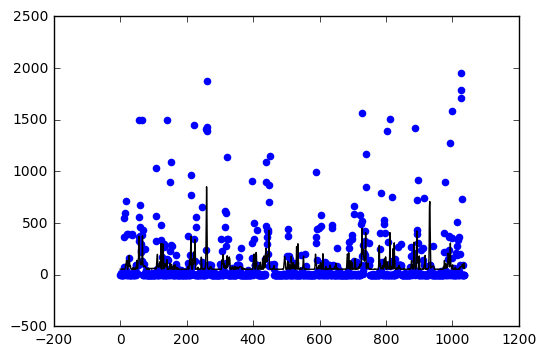

prediction score on test data is 0.462874
false positive rate is 0.000000
false negative rate is 0.537126


/Users/ywang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/ywang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [122]:
# get train and test
ndata1_ac_s_train, ndata1_ac_s_test = get_train_test(ndata1_ac_s, split=0.8)
ndata1_ac_s_model, ndata1_ac_s_model_features = get_ar_model(ndata1_ac_s_train, ndata1_ac_s_features, 'steps')
ndata1_ac_s_model_predicted, ndata1_ac_s_model_accuracy = ar_predict(ndata1_ac_s_model, ndata1_ac_s_test, 
                                                                     ndata1_ac_s_model_features, 'steps')
# pyplot.plot(ndata1_ac_s_model_predicted, color='blue')
# pyplot.plot(ndata1_ac_s_test['steps'], color='red')
# pyplot.show()
pyplot.scatter(range(len(ndata1_ac_s_model_predicted)), ndata1_ac_s_test['steps'], color='blue')
pyplot.plot(range(len(ndata1_ac_s_model_predicted)), ndata1_ac_s_model_predicted, color='black')

pyplot.show()
inactive_handler = lambda x: 10 if x == 0 else -10
ndata1_ac_s_test['predicted'] = [inactive_handler(i) for i in ndata1_ac_s_model_predicted]
ndata1_ac_s_test['inactive'] = [inactive_handler(i) for i in ndata1_ac_s_test['steps']]
get_model_accuracy(ndata1_ac_s_test['predicted'], ndata1_ac_s_test['inactive'])

Coefficients: 
 [ 0.10201168  0.253538    0.15796397]
Index(['stepsfeature_index671', 'stepsfeature_index672',
       'stepsfeature_index1343'],
      dtype='object')
Mean squared error: 58348.97
Variance score: 0.11


/Users/ywang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



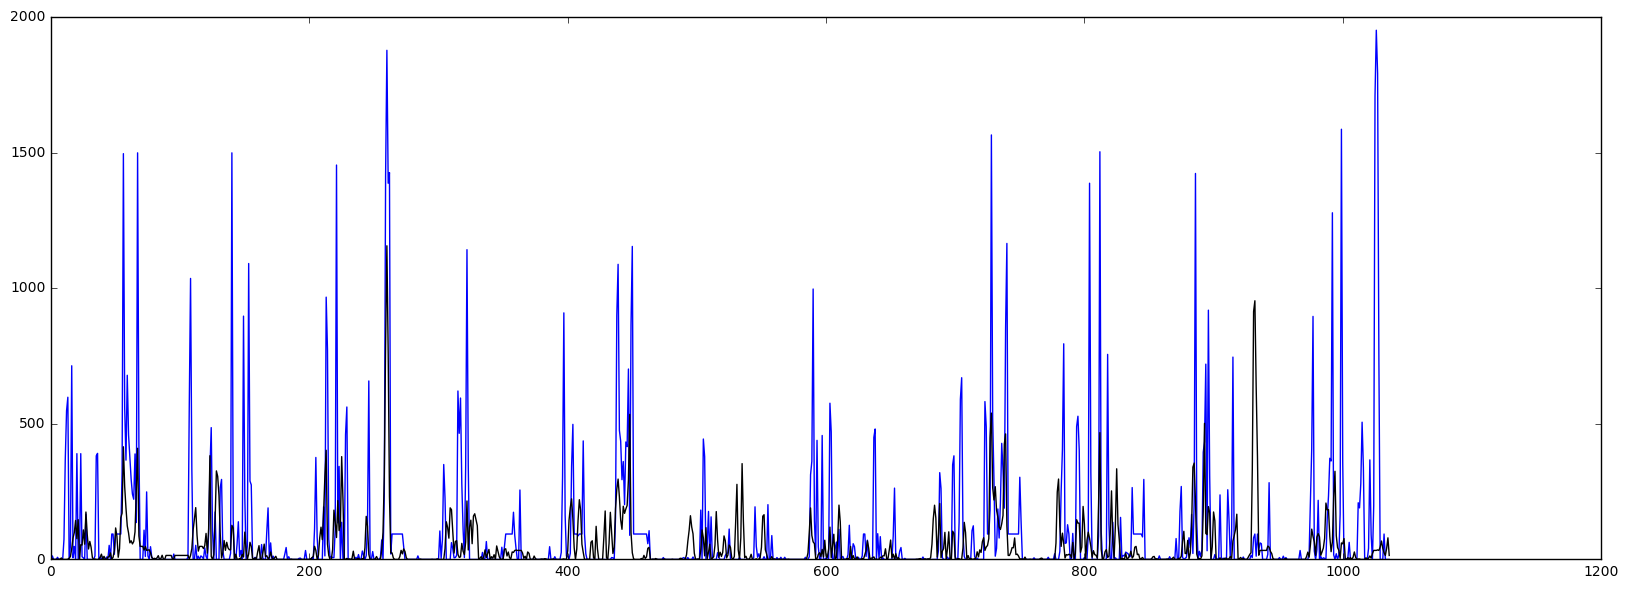

prediction score on test data is 0.580521
false positive rate is 0.076181
false negative rate is 0.343298


/Users/ywang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/ywang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [136]:
from sklearn import linear_model
import numpy as np


def get_ar_model(data, feature, target):
    X = data[feature]
    # X['x_0'] = [1] * len(X)
    y = data[target]
    # Create linear regression object
    model = linear_model.LinearRegression(fit_intercept=False)
    # Train the model
    model = model.fit(X, y)
    print('Coefficients: \n', model.coef_)
    print(X.columns)
    return model, feature

def ar_predict(model, data, feature, target):
    X = data[feature]
    # X['x_0'] = [1] * len(X)
    y = data[target]
    predicted = model.predict(X)
    data['predicted'] = predicted
    print("Mean squared error: %.2f"
          % np.mean((model.predict(X) - y) ** 2))
    print('Variance score: %.2f' % model.score(X, y))
    return predicted, model.score(X, y)


ndata1_ac_s_model, ndata1_ac_s_model_features = get_ar_model(ndata1_ac_s_train, ndata1_ac_s_features, 'steps')
ndata1_ac_s_model_predicted, ndata1_ac_s_model_accuracy = ar_predict(ndata1_ac_s_model, ndata1_ac_s_test, 
                                                                     ndata1_ac_s_model_features, 'steps')

pyplot.plot(range(len(ndata1_ac_s_model_predicted)), ndata1_ac_s_test['steps'], color='blue')
pyplot.plot(range(len(ndata1_ac_s_model_predicted)), ndata1_ac_s_model_predicted, color='black')
pyplot.show()


inactive_handler = lambda x: 10 if x == 0 else -10
ndata1_ac_s_test['predicted'] = [inactive_handler(i) for i in ndata1_ac_s_model_predicted]
ndata1_ac_s_test['inactive'] = [inactive_handler(i) for i in ndata1_ac_s_test['steps']]
get_model_accuracy(ndata1_ac_s_test['predicted'], ndata1_ac_s_test['inactive'])

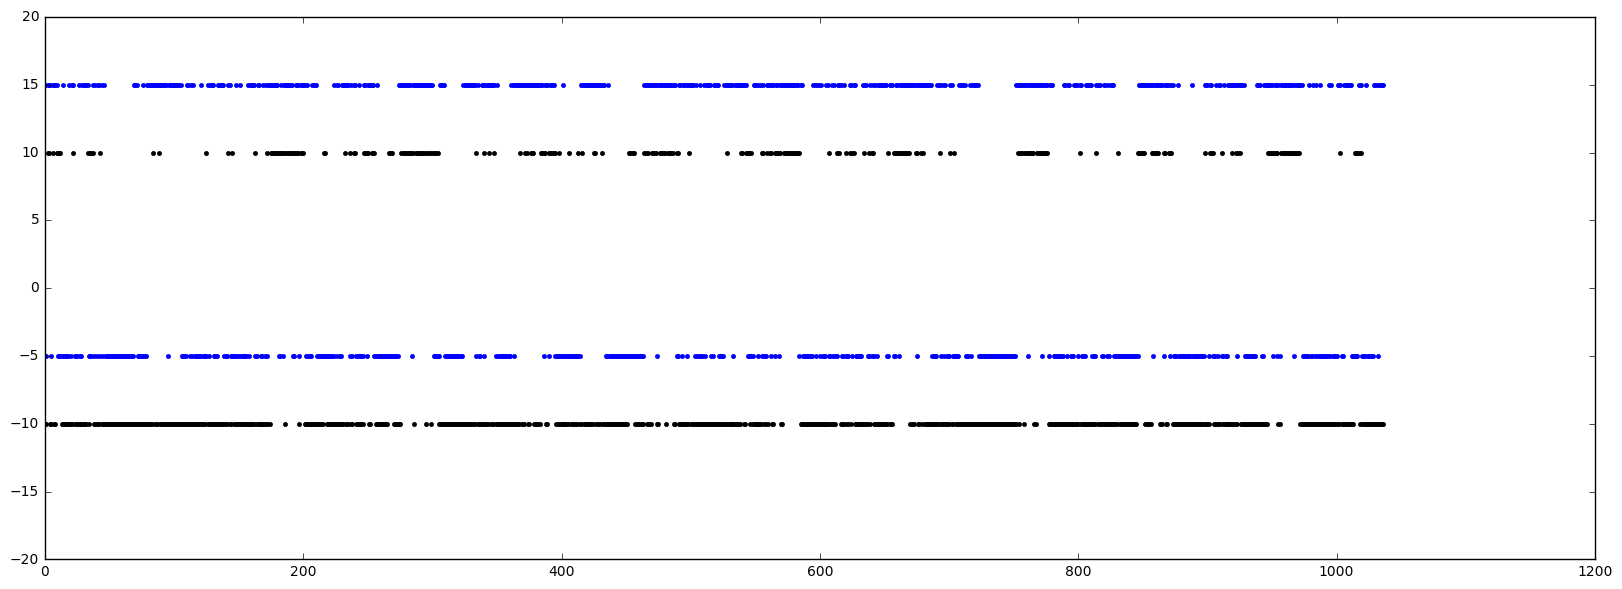

0.19382835101253615

In [145]:
pyplot.ylim(-20, 20)
pyplot.plot(range(len(ndata1_ac_s_model_predicted)), ndata1_ac_s_test['inactive']+5, '.', color='blue')
pyplot.plot(range(len(ndata1_ac_s_model_predicted)), ndata1_ac_s_test['predicted'], '.', color='black')
pyplot.show()

sum((ndata1_ac_s_test['predicted'] == 10) & (ndata1_ac_s_test['inactive'] == 10))/len(ndata1_ac_s_model_predicted)

In [155]:
from pandas.tseries.offsets import *

def get_prolonged_sedentary(data, colname):
    # 1. get consecutive inactive bouts
    data['inactive_bout'] = 0
    m = 0
    n = 1
    while n < len(data):
        if data.loc[m, colname] == 10:
            if data.loc[n, colname] == 10:
                # check if consecutive
                time_delta = data.loc[n, 'date_time'] - data.loc[n - 1, 'date_time']
                if time_delta == dt.timedelta(minutes=15):
                    data.loc[m, 'inactive_bout'] += 1
                    n += 1
                else:
                    m = n
                    n = m + 1
            else:
                m = n + 1
                n = m + 1
        else:
            m = n
            n += 1
    # # 2. fill in intervals within prolonged sedentary time with 1
    # data['sedentary'] = 0
    # i = 0
    # while i < len(data):
    #     n_bout = data.inactive_bout[i]
    #     if n_bout >= 5:  # >= 90min
    #         j = i
    #         while j <= i + n_bout:
    #             data.loc[j, 'sedentary'] = 1
    #             j += 1
    #     i += 1
    # print(data[445:460])
    return data


def get_notification(data, reference_col):
    data = data[data[reference_col] >= 5]
    # print(data.head())
    data = data.reset_index()
    date_time = []
    notification = []
    for i in data.index:
        num_msg = math.floor((data.loc[i, reference_col] + 1) / 6)
        start_time = pd.to_datetime(data.date_time[i]) + DateOffset(hours=1.5)
        for j in range(num_msg):
            date_time.append(start_time)
            notification.append("notification")
            start_time = start_time + DateOffset(hours=1.5)
    notification = pd.DataFrame({'date_time': date_time, 'notification': notification})
    notification.reset_index(drop=True, inplace=True)
    filter_not = [True]
    for i in range(len(notification)-1):
        time_d = notification.date_time[i+1] - notification.date_time[i]
        if time_d <= dt.timedelta(hours=2):
            filter_not.append(False)
        else:
            filter_not.append(True)
    notification = notification[filter_not]
    notification = notification[notification.date_time.map(lambda x: x.hour in range(7,24))]
    print("notifications generated as follow")
    print(notification)
    return notification

In [157]:
ndata1_ac_s_test.reset_index(inplace=True, drop=True)
ndata1_ac_s_test_original = get_prolonged_sedentary(ndata1_ac_s_test, 'inactive')
print('notifications of the observed data:')
notification_original = get_notification(ndata1_ac_s_test_original, 'inactive_bout')
ndata1_ac_s_test_not_predicted = get_prolonged_sedentary(ndata1_ac_s_test, 'predicted')
print('notifications of the predicted data:')
notification_predicted = get_notification(ndata1_ac_s_test_not_predicted, 'inactive_bout')


/Users/ywang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/ywang/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



notifications of the observed data:
notifications generated as follow
             date_time  notification
5  2016-10-19 15:45:00  notification
9  2016-10-20 15:15:00  notification
10 2016-10-20 19:30:00  notification
14 2016-10-21 14:00:00  notification
20 2016-10-22 17:45:00  notification
24 2016-10-23 23:30:00  notification
32 2016-10-26 19:15:00  notification
35 2016-10-27 08:15:00  notification
36 2016-10-27 17:45:00  notification
notifications of the predicted data:
notifications generated as follow
            date_time  notification
4 2016-10-21 07:45:00  notification
